# Homework 1 - data validation & cleaning (deadline 16. 11. 2025, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best as possible!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  1. Check consistency (i.e., that the same things are represented in the same way) of at least **three features** where you expect problems (including the "Object Name" feature). You can propose how to clean the selected features. However, **do not apply cleaning** (in your interest) 🙂 _(1.5 points)_
  1. Select at least **two features** (i.e., one couple) where you expect integrity problems (describe your choice) and check the integrity of those features. By integrity, we mean correct logical relations between features (e.g., female names for females only). _(2 points)_
  1. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical (i.e., ordinal or nominal), and one datetime. _(1.5 points)_
  1. Find some outliers and describe your method. _(3 points, depends on creativity)_
  1. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature** using some imputation method (i.e., imputation by mean or median is too trivial to obtain any points). _(2 + 3 points, depends on creativity)_
  1. Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later. _(3 points)_
  1. Focus on the extraction of the physical dimensions of each item (width, depth, and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps, your choices of methods, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for 2 points together with the final presentation of the solution. 

**If you do all this properly, you will obtain 20 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

In [375]:
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)

# Dataset loading and first look

In [376]:
df = pd.read_csv("openaccess/MetObjects.csv")

/var/folders/ms/rh6hs5x12g1b3s1v7jswnrs40000gn/T/ipykernel_72986/88115772.py:1: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("openaccess/MetObjects.csv")


In [377]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",American,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


We can set Object ID column as ID for df because it represents ID

In [378]:
df["Object ID"].unique().shape[0] == df.shape[0]

True

In [379]:
df = df.set_index(["Object ID"])

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484956 entries, 1 to 900748
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Gallery Number           49541 non-null   object 
 5   Department               484956 non-null  object 
 6   AccessionYear            481094 non-null  object 
 7   Object Name              482690 non-null  object 
 8   Title                    456153 non-null  object 
 9   Culture                  208190 non-null  object 
 10  Period                   91143 non-null   object 
 11  Dynasty                  23201 non-null   object 
 12  Reign                    11236 non-null   object 
 13  Portfolio                26514 non-null   object 
 14  Constitue

---

# Check consistency

**Object Name**

In [381]:
df["Object Name"].value_counts().sort_index()[:100]

Object Name
"Autophone" Organette                                                                1
"Basso"                                                                              1
"Chanot Model" Violin                                                                1
"Humantone" Nose Flute                                                               1
"Japanese Fiddle"                                                                    1
"Ladies in Blue" Fresco                                                              1
"Musical Ball" ("Return Ball")                                                       1
"New Year's Bottle" with cow goddess Nebethetepet                                    1
"Persian" Sitar                                                                      1
"Russian Bassoon" (Bass Horn)                                                        1
"Savart model" Violin                                                                1
"Shield frieze" Fresco         

By reviewing 100 values we can see inconsistencies. For example, duplicate categories exist due to **case sensitivity** ('Accessory Set' vs 'Accessory set'). Also, it has **inclusion of quantities** within the name (e.g., '12 textile samples' vs '13 textile samples'). Additionally, and **pluralization** ('Accessory' vs 'Accessories'). There are also hidden inconsistencies caused by **trailing whitespace**, as 'Accessory' appears as two distinct unique values

I propose cleaning by: 
* Stripping leading/trailing whitespace
* Removing leading numerical digits to unify counted objects
* Converting all text to lowercase
* Removing punctuation like quotes and commas

**Medium**

In [382]:
df["Medium"].value_counts()[:50]

Medium
Terracotta                                  23514
Commercial color lithograph                 18206
Etching                                     17325
Engraving                                   11736
Gelatin silver print                        10411
Albumen photograph                          10152
Silk                                         8501
Bronze                                       7225
Lithograph                                   6987
Glass                                        6509
Film negative                                5894
Faience                                      4931
Albumen silver print from glass negative     4809
Woodcut                                      4753
Silver                                       4719
silk                                         4674
Gold                                         3851
Etching and engraving                        3598
Oil on canvas                                3507
Commercial color photolithograph           

In [383]:
df["Medium"].value_counts().sort_index()[:50]

Medium
\r\n                                                                                                                                                         6
\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nPen and black ink, watercolor and gouache with gum arabic and metallic ink               1
\r\nBlue faience                                                                                                                                             1
\r\nBrass or bronze                                                                                                                                          1
\r\nCarnelian\r\nGold                                                                                                                                        1
\r\nColor lithograph                                                                                                                                         1
\r\nCopper-silver alloy (shibuichi), co

By reviewing 100 values (50 most frequent and 50 alphabetic) we can see inconsistncy. Again as in previous case, duplicates exist due to **case sensitivity** (e.g., 'Silk' vs 'silk'). Then, there are **formatting artifacts** such as leading newlines (\r\n) and quotes. Also, the feature has high cardinality due to **granular descriptions** (e.g., distinct categories for 'Hard-paste porcelain' and 'Soft-paste porcelain')

I propose cleaning this by:
* Stripping whitespace and punctuation <br>
* Lowercasing all text <br>
* Mapping values to n (n not would be determined by some meaningfull threshold) high-level categories (e.g., mapping all porcelains to 'Ceramic', all lithographs to 'Paper') based on keyword containment."

**Artist Gender**

291 unique genders is suspicious

In [384]:
len(df["Artist Gender"].unique())

291

In [385]:
df["Artist Gender"].value_counts()[:15]

Artist Gender
|                58718
||               21654
Female            8915
|||               6685
Female|           2720
||||              2227
|Female           1052
|||||              811
||||||             695
Female||           476
|||||||            311
|Female|           296
||Female           244
Female|Female      197
||||||||           155
Name: count, dtype: int64

The pipe here may represent gender of each author for a single museum object

Will be working with this feauture later and using another representation

In [387]:
df["Artist Display Name"]

Object ID
1          James Barton Longacre
2             Christian Gobrecht
3                            NaN
4                            NaN
5                            NaN
                   ...          
900605          Douglas Gorsline
900606          Douglas Gorsline
900633    Edmond Mario Granville
900717    Michel Eugène Chevreul
900748          Frank M. Gregory
Name: Artist Display Name, Length: 484956, dtype: object

---

# Integrity problems

Object Begin Date vs. Object End Date. <br>
Object Begin Date must always be less than or equal to Object End Date


In [388]:
df[["Object Begin Date", "Object End Date"]].isna().any().sum()

np.int64(0)

In [389]:
df["Object Begin Date"].describe()

count    484956.000000
mean       1303.913734
std        1710.259182
min     -400000.000000
25%        1535.000000
50%        1800.000000
75%        1891.000000
max        5000.000000
Name: Object Begin Date, dtype: float64

In [390]:
df["Object End Date"].describe()

count    484956.000000
mean       1402.978142
std        1132.101347
min     -240000.000000
25%        1593.000000
50%        1840.000000
75%        1905.000000
max        2870.000000
Name: Object End Date, dtype: float64

Describtion gives us intuition, that values are valid numbers. Negative values are most likely to be years b.c.

In [391]:
df[df["Object Begin Date"] > df["Object End Date"]]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
Object ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32256,32.75.260,False,False,True,370.0,Arms and Armor,1932.0,Sword,Sword (Falcata),Iberian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5th–1st century BCE,5,0,Iron alloy,H. 20 15/16 in. (53.2 cm); H. of blade 17 in. ...,"The Collection of Giovanni P. Morosini, presen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swords,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q116316920,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
38468,1988.354,True,True,True,999.0,Asian Art,1988.0,Yaksha,NaN,"India, Madhya Pradesh",Shunga period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 50 BCE,-45,-55,Sandstone,H. 35 in. (88.9 cm); W. 18 in. (45.7 cm); D. 1...,"Gift of Jeffrey B. Soref, in honor of Martin L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q29383272,NaN,"Metropolitan Museum of Art, New York, NY",Shunga,http://vocab.getty.edu/page/aat/300018880,
44893,1975.268.167,False,False,True,224.0,Asian Art,1975.0,Statue,十一面観音立像 (Jūichimen Kannon ryūzō)|Jūichimen Kan...,Japan,Nanbokuchō period (1336–92),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mid- to late 14th century,1300,14,"Wood with lacquer, gold leaf, and metal decora...",Overall (figure): H. 78 3/8 in. (199.1 cm); W....,The Harry G. C. Packard Collection of Asian Ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q116374282,NaN,"Metropolitan Museum of Art, New York, NY",Buddhism|Avalokiteshvara|Bodhisattvas,http://vocab.getty.edu/page/aat/300073738|http...,https://www.wikidata.org/wiki/Q748|https://www...
55128,JP3180,False,False,True,NaN,Asian Art,1959.0,Print,NaN,Japan,Edo period (1615–1868),NaN,NaN,NaN,16545,Artist,,Utagawa (Gountei) Sadahide,"Japanese, 1807–1878/79",,Utagawa (Goutei) Sadahide,Japanese,1807,1879,NaN,http://vocab.getty.edu/page/ulan/500072517,https://www.wikidata.org/wiki/Q3552727,"1861, 9th month",1861,9,Middle panel of a triptych of woodblock prints...,O-ban triptych with JP3179,"Gift of Lincoln Kirstein, 1959",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
107853,C.I.55.59,False,False,True,NaN,Costume Institute,1955.0,Dolman,Dolman,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800–1875,1875,1800,"wool, silk, glass",NaN,"Gift of Miss Miriam W. Donnelly, 1955",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
195371,25.142.17,False,False,True,NaN,European Sculpture and Decorative Arts,1925,Head,Head of a Child with Hair,Northern Italian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,after an early 16th-century model,1500,0,"Bronze, eyes polished",Overall with bolt: 4 1/2 × 3 × 3 1/2 in. (11.4...,"Gift of Ogden Mills, 1925",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture-Bronze,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Muse

All returned rows are integrity violation

---

# Proper data types

In [392]:
df.dtypes

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constituent ID              object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date                 object
Object Begin Date   

**Constituent ID**

In [393]:
df["Constituent ID"][:40]

Object ID
1         16429
2           107
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          108
11          107
12        16429
13          108
14          107
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
30          NaN
31          NaN
32          NaN
33        16459
34          108
35    108316253
36          108
37        16428
38        16428
39          NaN
40          108
Name: Constituent ID, dtype: object

Check if all non nan values are numbers

In [394]:
if_digit_df = df["Constituent ID"].apply(lambda x: str(x).isdigit()) == df["Constituent ID"].notna()

In [395]:
if_digit_df.shape[0] == df.shape[0]

True

From first 40 values it seems like the value could be extremely big check how many there are

In [396]:
mask_huge = df["Constituent ID"].astype(str).str.len() > 19
print(f"Found {mask_huge.sum()} huge IDs.")

Found 10856 huge IDs.


These are most likely not to be ids, but rather garbage data, considering someone put the big num by mistake

In [397]:
df.loc[mask_huge, "Constituent ID"] = np.nan

In [398]:
df["Constituent ID"] = pd.to_numeric(df["Constituent ID"], errors="coerce")
df["Constituent ID"] = df["Constituent ID"].astype("UInt64")

In [399]:
df["Constituent ID"].dtype

UInt64Dtype()

**Object Begin Date**

Already worked with this one and previous checked showed it represents just a year and will be easy to work with (no nans)

In [400]:
df["Object Begin Date"] = pd.to_numeric(df["Object Begin Date"], errors="coerce")

In [401]:
df["Object Begin Date"].info()

<class 'pandas.core.series.Series'>
Index: 484956 entries, 1 to 900748
Series name: Object Begin Date
Non-Null Count   Dtype
--------------   -----
484956 non-null  int64
dtypes: int64(1)
memory usage: 7.4 MB


**Department**

In [402]:
df["Department"].unique()

array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'Egyptian Art', 'European Paintings', 'Robert Lehman Collection',
       'The Cloisters', 'Musical Instruments', 'The Libraries'],
      dtype=object)

In [403]:
df["Department"] = df["Department"].astype("category")
df["Department"].info()

<class 'pandas.core.series.Series'>
Index: 484956 entries, 1 to 900748
Series name: Department
Non-Null Count   Dtype   
--------------   -----   
484956 non-null  category
dtypes: category(1)
memory usage: 4.2 MB


**Artist Begin Date**

In [404]:
df["Artist Begin Date"].value_counts()[-10:]

Artist Begin Date
1595      |1611      |              1
1782      |1804                     1
1838      |1832                     1
1743      |1744                     1
1796      |1822      |1861          1
1732      |1716      |1714          1
1733      |1800      |1700          1
1733      |1700                     1
1868      |1840                     1
1945-10-19                          1
Name: count, dtype: int64

In [405]:
column_as_str = df["Artist Begin Date"].astype(str)

Check how many ISO format days

In [406]:
iso_pattern = r"\d{4}-\d{2}-\d{2}"

In [407]:
column_as_str.str.contains(iso_pattern, na=False).sum()

np.int64(2367)

Leaving the first valid year after '|' exist (most important author)

In [408]:
s_cleaned = s_cleaned.str.strip()

In [409]:
date_pattern = r"(\d{4}-\d{2}-\d{2}|\b\d{4}\b)"

Making two different columns - only year and ISO format

In [410]:
s_cleaned = df["Artist Begin Date"].astype(str).str.extract(date_pattern, expand=False)

In [411]:
df["Artist Begin Date"] = pd.to_datetime(s_cleaned, errors="coerce")

In [412]:
df["Artist Begin Date Year"] = df["Artist Begin Date"].dt.year

In [413]:
df["Artist Begin Date Year"] = df["Artist Begin Date Year"].astype('Int64')

In [414]:
df[["Artist Begin Date", "Artist Begin Date Year"]].sample(10)

,Artist Begin Date,Artist Begin Date Year
Object ID,,
284021,1886-01-01,1886
313937,NaT,<NA>
419811,NaT,<NA>
706225,1819-01-01,1819
203330,1744-01-01,1744
400471,1750-01-01,1750
247199,NaT,<NA>
269526,1903-01-01,1903
414925,NaT,<NA>


**Medium** - making categorise and doing **part 7.** at the same time

In [415]:
medium_clean = df["Medium"].astype(str).str.lower().str.strip()

In [416]:
medium_clean.value_counts()[:50]

Medium
terracotta                                  23547
commercial color lithograph                 19001
etching                                     17524
silk                                        13322
engraving                                   11777
gelatin silver print                        10458
albumen photograph                          10152
bronze                                       7275
nan                                          7215
lithograph                                   7041
glass                                        6679
film negative                                5894
cotton                                       5472
faience                                      4999
albumen silver print from glass negative     4809
silver                                       4804
woodcut                                      4771
gold                                         3944
etching and engraving                        3655
oil on canvas                              

In [417]:
medium_clean.value_counts()[-50:]

Medium
satin worked with silk and metal thread; satin, long-and-short, and couching stitches                                                                                                                                                                  1
satin worked with silk and metal thread; long-and-short, satin, split, and couching stitches                                                                                                                                                           1
wool, silk, silver-metal-wrapped thread, containing a seventeenth-century printed book                                                                                                                                                                 1
canvas worked with silk and metal thread, glass beads, spangles; gobelin, tent, and detached buttonhole stitches; silk cord and silk and metal thread tassels                                                                                         

Brute forsing to map by eye to map messy text into new categories (threshold for category is 1000, chosen by eye on intuition)

In [418]:
counts = medium_clean.value_counts()
counts[counts > 1000].index

Index(['terracotta', 'commercial color lithograph', 'etching', 'silk',
       'engraving', 'gelatin silver print', 'albumen photograph', 'bronze',
       'nan', 'lithograph', 'glass', 'film negative', 'cotton', 'faience',
       'albumen silver print from glass negative', 'silver', 'woodcut', 'gold',
       'etching and engraving', 'oil on canvas',
       'commercial color photolithograph', 'commercial photolithograph',
       'albumen silver print', 'wood', 'wool', 'hard-paste porcelain',
       'woodblock print; ink and color on paper', 'wood engraving', 'stone',
       'porcelain', 'linen', 'ceramic', 'limestone', 'bobbin lace',
       'hand-colored etching', 'steel', 'iron', 'ivory', 'color lithograph',
       '[no medium available]', 'soft-paste porcelain', 'limestone, paint',
       'leather', 'graphite', 'earthenware', 'commercial lithograph',
       'pottery', 'pottery and ink, paint',
       'salted paper print from paper negative', 'silk / compound weave',
       'silk and me

Generelizing to most frequent types

In [419]:
conditions = [
    medium_clean.str.contains('porcelain|terracotta|faience|earthenware|pottery'),
    medium_clean.str.contains('gelatin silver print|albumen photograph'),
    medium_clean.str.contains('lithograph|etching|woodcut|engraving|graphite'),
    medium_clean.str.contains('silk|cotton|wool|linen|lace'),
    medium_clean.str.contains('oil on canvas'),
    medium_clean.str.contains('oil'),
    medium_clean.str.contains('canvas'),
    medium_clean.str.contains('gold|silver|bronze|iron|steel'),
    medium_clean.str.contains('wood'),
    medium_clean.str.contains('glass'),
    medium_clean.str.contains('limestone|marble|stone'),
    medium_clean.str.contains('ivory'),
    medium_clean.str.contains('[no medium available]'),
]

In [420]:
choices = [
    'Ceramic/Clay',
    'Photograph',
    'Paper',
    'Fabric/Textile',
    'Oil on Canvas',
    'Oil',
    'Canvas',
    'Metal',
    'Wood',
    'Glass',
    'Stone',
    'Ivory',
    'Unknown'
]

In [421]:
df["Medium_Cat"] = np.select(conditions, choices, default="Other")

In [422]:
df["Medium_Cat"] = df["Medium_Cat"].astype("category")

In [423]:
df["Medium_Cat"].value_counts()

Medium_Cat
Paper             134948
Unknown           109289
Fabric/Textile     56636
Metal              56250
Ceramic/Clay       52894
Photograph         21617
Wood               16871
Glass              13745
Stone              12852
Oil on Canvas       3659
Ivory               3416
Oil                 2336
Canvas               437
Other                  6
Name: count, dtype: int64

---

# Outliers

I will be finding outliers on Artist Begin Date, it will be easier since it was preprocessed above

In [446]:
df["Object Begin Date"].sample(3)

Object ID
643561    1880
406659    1888
274370    1945
Name: Object Begin Date, dtype: int64

In [456]:
data = df["Object Begin Date"].dropna()

We see how from the box following plot we couldnt extract any info, so I will narrow down by filtering out to get general idea behind the data

<Axes: >

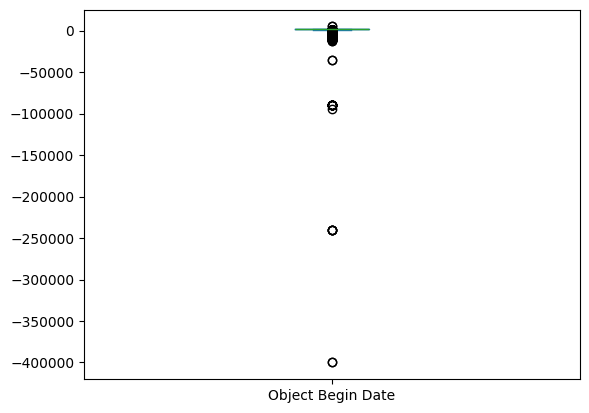

In [466]:
data.plot.box()

<Axes: >

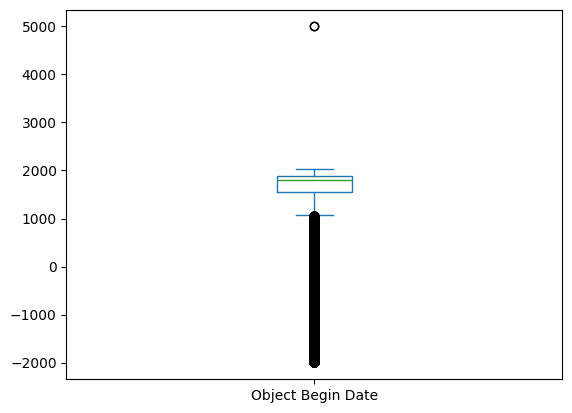

In [470]:
data[data > -2000].plot.box()

We can see, that Object Begin Date feature is **heavily skewed**

Using the standard 1.5x IQR method:

In [471]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

In [472]:
IQR = Q3 - Q1

In [473]:
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

In [474]:
print(f"Data range: {data.min()} to {data.max()}")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Fence (Outliers below): {lower_fence}")
print(f"Upper Fence (Outliers above): {upper_fence}")

Data range: -400000 to 5000
Q1: 1535.0, Q3: 1891.0, IQR: 356.0
Lower Fence (Outliers below): 1001.0
Upper Fence (Outliers above): 2425.0


In [462]:
outliers = df[
    (df["Object Begin Date"] < lower_fence) | 
    (df["Object Begin Date"] > upper_fence)
]

print(f"\nFound {len(outliers)} outliers.")


Found 91059 outliers.


This method identified 91,059 outliers, the number is most likely not due to data error, but due to the heavily skewed, non-normal distribution of the museum's collection

---

# Missing data

**State**

In [483]:
len(df["State"].unique())

109

The State feature has only 109 unique values, they could be easily checked by eye:

In [501]:
df["State"].value_counts()

State
Staffordshire                        290
Queens                                49
Bristol                               49
West Midlands                         43
West Yorkshire                        39
Merseyside                            38
Brooklyn                              36
Lancaster County                      33
South Yorkshire                       23
Bucks County                          17
Berks County                          17
Staffordshire|Staffordshire           10
Montgomery County                     10
Chester County                         9
Orange County                          7
Dutchess County                        6
Cumberland County                      6
Haute-Vienne                           6
Connecticut River Valley               6
Frederick County                       5
Bouches-du-Rhône                       5
Dauphin County                         5
Lebanon County                         4
Essex County                           4
Long Islan

We see, that only two non valid values are '||' and '|', will replace them to np.nan

In [485]:
df["State"] = df["State"].replace(['|', "||"], np.nan)

In [494]:
df["State"].info()

<class 'pandas.core.series.Series'>
Index: 484956 entries, 1 to 900748
Series name: State
Non-Null Count  Dtype 
--------------  ----- 
835 non-null    object
dtypes: object(1)
memory usage: 7.4+ MB


**Artist Gender**

The raw Artist Gender column is unusable for analysis. It has thousands of unique string combinations (like ||Female|||, Female|, etc.) The most logical "proper representation" is to extract the single most important piece of information from this messy string: "Does this artwork involve at least one female artist?"

In [498]:
df["Artist Gender"] = df["Artist Gender"].fillna('')
df["Has_Female_Artist"] = df["Artist Gender"].str.contains("F|f", case=False)
df["Has_Female_Artist"] = df["Has_Female_Artist"].astype(int)
df["Has_Female_Artist"].value_counts()

Has_Female_Artist
0    470289
1     14667
Name: count, dtype: int64

**Country**

Country should be easily determined by the City and the date when the object was created

Making categorical out of City and Country

In [508]:
df["City"] = df["City"].str.capitalize().astype("category")
df["Country"] = df["Country"].str.capitalize().astype("category")

In [511]:
df["City_Code"] = df["City"].cat.codes
df["Country_Code"] = df["Country"].cat.codes

In [512]:
train_df = df.loc[
    df["Country"].notna() & 
    df["City"].notna() & 
    df["Object Begin Date"].notna()
]

In [513]:
to_predict_df = df.loc[
    df["Country"].isna() &
    df["City"].notna() & 
    df["Object Begin Date"].notna()
]

In [514]:
print(f"Training on {len(train_df)} rows.")
print(f"Predicting for {len(to_predict_df)} rows.")

Training on 18395 rows.
Predicting for 14359 rows.


In [516]:
features = ["City_Code", "Object Begin Date"]
target = "Country_Code"

X_train = train_df[features]
y_train = train_df[target]

X_predict = to_predict_df[features]

A KNeighborsClassifier was trained on rows with complete data to find the 5-nearest-neighbors (based on City and Object_Year) for each row with a missing Country

In [517]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [518]:
predicted_country_codes = classifier.predict(X_predict)

In [519]:
df.loc[to_predict_df.index, "Country_Code"] = predicted_country_codes

In [523]:
country_key = df["Country"].cat.categories

In [527]:
predicted_names = pd.Categorical.from_codes(
    codes=predicted_country_codes, 
    categories=country_key
)

In [528]:
imputed_values_series = pd.Series(predicted_names, index=to_predict_df.index)

In [529]:
df["Country"] = df["Country"].fillna(imputed_values_series)

---

# Extraction of the physical dimensions

In [531]:
df["Dimensions"].value_counts()

Dimensions
sheet: 2 11/16 x 1 3/8 in. (6.9 x 3.5 cm)                                                                                                       2297
Sheet: 2 3/4 x 1 1/2 in. (7 x 3.8 cm)                                                                                                           2278
Sheet: 2 1/2 × 1 7/16 in. (6.4 × 3.7 cm)                                                                                                        2141
Sheet: 2 3/4 × 1 1/2 in. (7 × 3.8 cm)                                                                                                           1966
35mm                                                                                                                                            1458
                                                                                                                                                ... 
H. 55 7/8 x W. 29 1/2 x D. 5 in. (141.9 x 74.9 x 12.7 cm)                                      

regex captures all text right before "cm" (the [^\(\)]* part), while \(? and \)? make the surrounding parentheses optional

In [537]:
p = df["Dimensions"].str.extract(r"\(?([^\(\)]*)cm\)?", expand=False)
p

Object ID
1                  NaN
2                  NaN
3                 1.7 
4                 1.7 
5                 1.7 
              ...     
900605       10 × 6.4 
900606    20.9 × 17.5 
900633      22.2 × 15 
900717             29 
900748    16.9 × 29.9 
Name: Dimensions, Length: 484956, dtype: object

In [538]:
result = p.str.extract(r"([\d\.]+)[^\d\.]*([\d\.]+)?[^\d\.]*([\d\.]+)?").rename({
    0:"Dim1_cm", 1:"Dim2_cm", 2:"Dim3_cm"
}, axis=1)
result

,Dim1_cm,Dim2_cm,Dim3_cm
Object ID,,,
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,1.7,NaN,NaN
4,1.7,NaN,NaN
5,1.7,NaN,NaN
...,...,...,...
900605,10,6.4,NaN
900606,20.9,17.5,NaN
900633,22.2,15,NaN


# The End

In [539]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Artist Begin Date Year,Medium_Cat,Has_Female_Artist,City_Code,Country_Code,Imputed_Country_Name,Dim1_cm,Dim2_cm,Dim3_cm
Object ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",,"Longacre, James Barton",American,1794-01-01,1869,,http://vocab.getty.edu/page/ulan/500011409,https://www.wikidata.org/wiki/Q3806459,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1794,Metal,0,-1,-1,NaN,NaN,NaN,NaN
2,1980.264.5,False,False,False,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,,Christian Gobrecht,1785–1844,,"Gobrecht, Christian",American,1785-01-01,1844,,http://vocab.getty.edu/page/ulan/500077295,https://www.wikidata.org/wiki/Q5109648,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1785,Metal,0,-1,-1,NaN,NaN,NaN,NaN
3,67.265.9,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,<NA>,Metal,0,-1,-1,NaN,1.7,NaN,NaN
4,67.265.10,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,<NA>,Metal,0,-1,-1,NaN,1.7,NaN,NaN
5,67.265.11,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,<NA>,Metal,0,-1,-1,NaN,1.7,NaN,NaN
